In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
def pagerank(df, beta, threshold=10**(-20), epochs=100):
    
    ip_list = df['src_ip'].unique().tolist() + df['dst_ip'].unique().tolist()
    ip_list = list(set(ip_list))
    
    ip_dict = dict()
    for i, ip in enumerate(ip_list):
        ip_dict[ip] = i
    
    num_nodes = len(ip_list)
    neighbors = [[] for _ in range(num_nodes)]
    
    for i, row in df.iterrows():
        src = ip_dict[row['src_ip']]
        dst = ip_dict[row['dst_ip']]
        neighbors[src].append(dst)
    
    r = [1/num_nodes] * num_nodes
    
    for epoch in range(epochs):
        r_next = [0] * num_nodes
        
        for u in range(num_nodes):
            for v in neighbors[u]:
                r_next[v] += (1-beta) * r[u] / len(neighbors[u])
                
        teleport_prob = 1-sum(r_next)
        for u in range(num_nodes):
            r_next[u] += teleport_prob / num_nodes
            
        delta = sum(abs(a-b) for a, b in zip(r, r_next))
        
        r = r_next
        
        if delta < threshold:
            break
            
    return r, ip_list

In [3]:
total_df = pd.read_csv('grouped.csv')

In [4]:
grouparr = [6, 1, 45, 23, 55,  2, 18, 28, 35, 50, 24, 48, 14,
            30, 39, 41, 65, 17, 58, 38, 60, 69, 32,  5, 31, 64, 51, 56, 34, 52,
            26, 44, 22, 54, 10, 46,  7, 27, 42, 53, 47, 40, 61, 20,  8, 33, 21,
            37, 15,  9, 62, 36, 68, 67, 19, 57, 12, 63, 16, 29,  4,  3, 25]

In [5]:
X = [0.001 * i for i in range(100)]

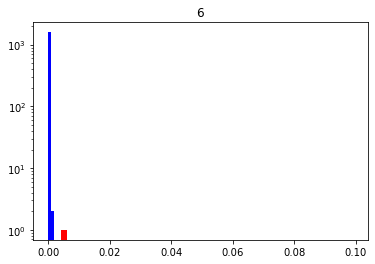

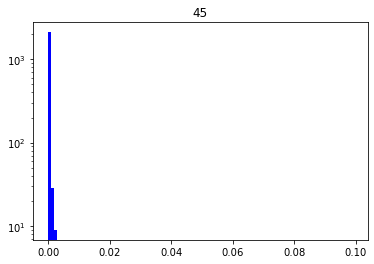

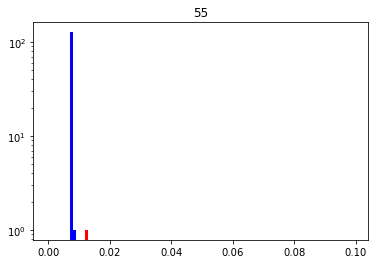

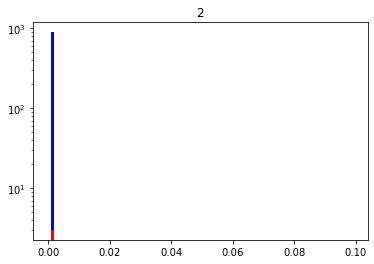

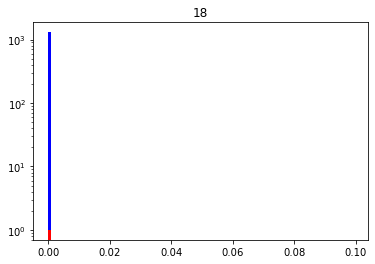

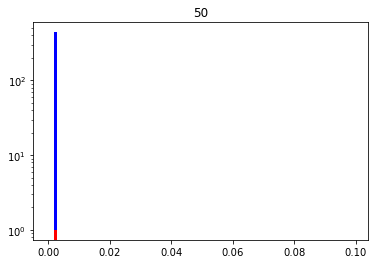

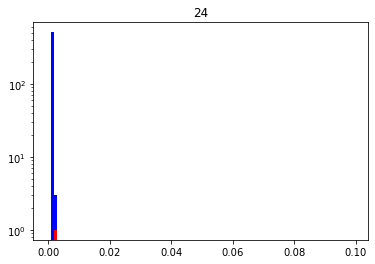

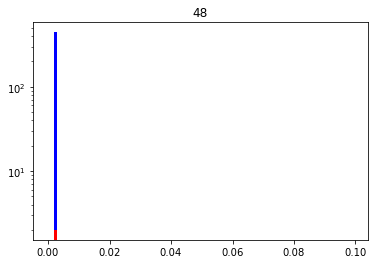

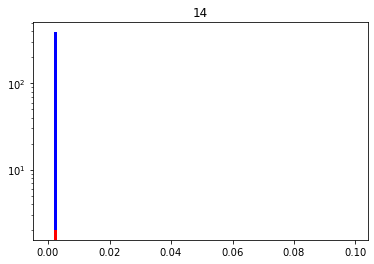

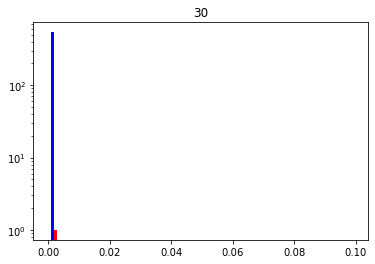

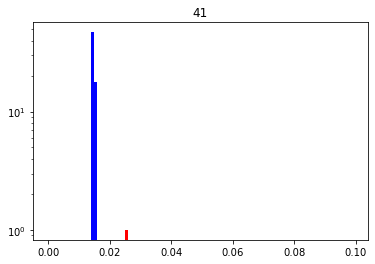

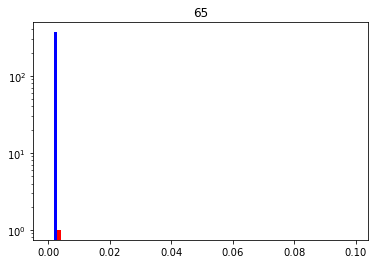

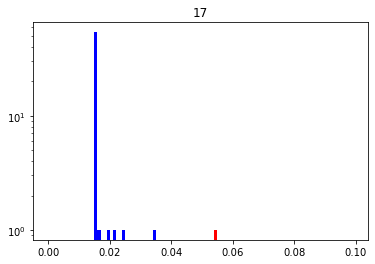

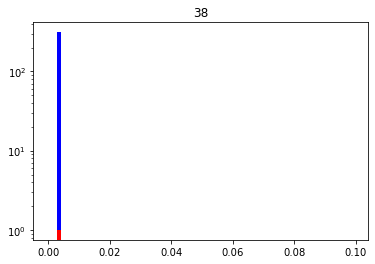

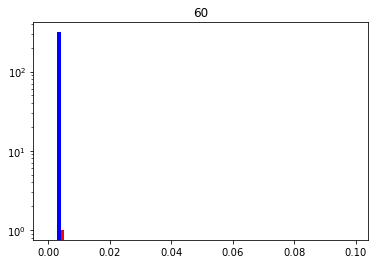

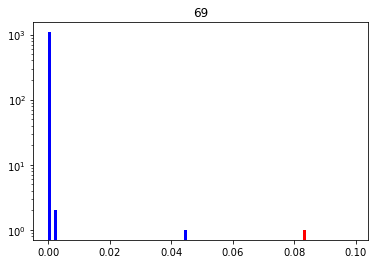

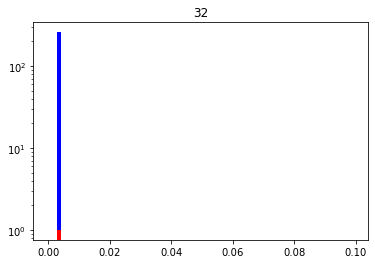

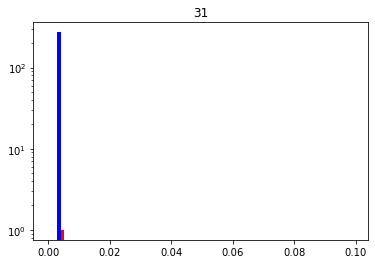

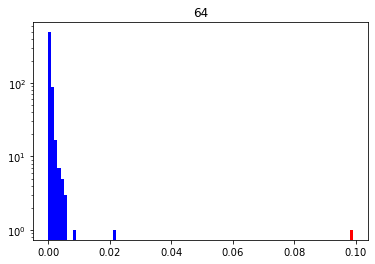

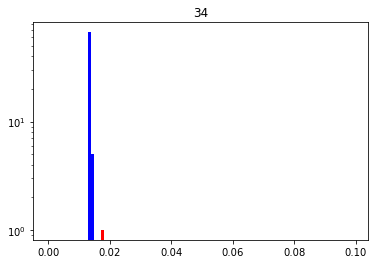

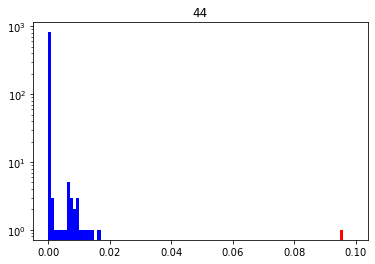

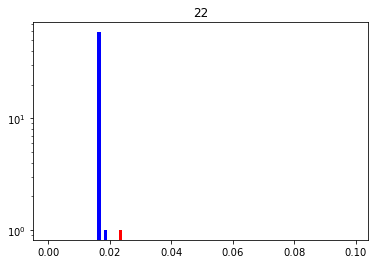

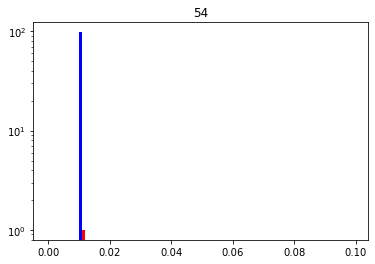

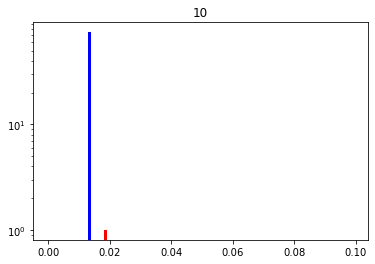

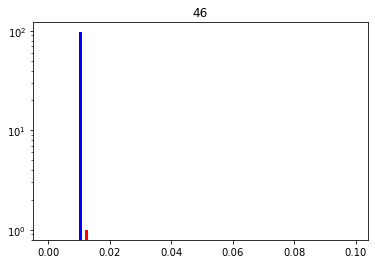

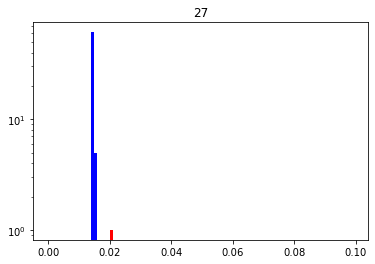

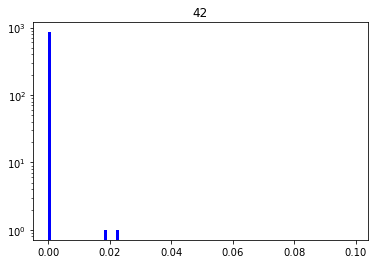

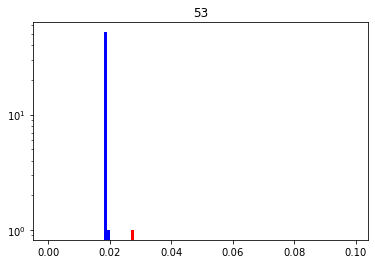

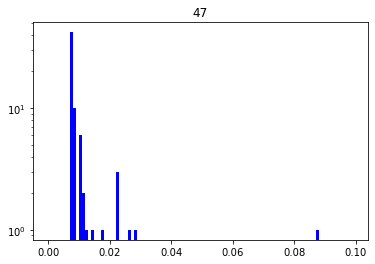

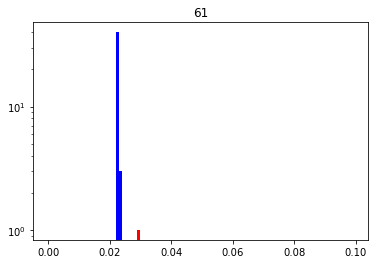

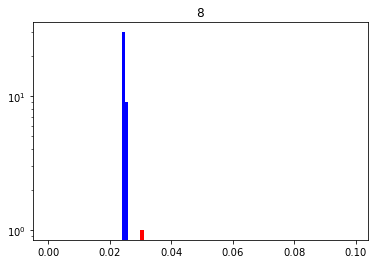

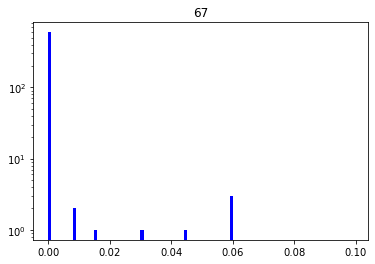

In [6]:
for group in grouparr:
    ben = []
    mal = []
    
    df = total_df[(total_df['group']==group)]
    r, ip = pagerank(df, 0.15)
    
    score = np.array(r)
    mean = np.mean(score)
    sigma = np.std(score)
    
    for i in range(len(r)):
        if mean - 6*sigma <= r[i] <= mean + 6*sigma:
            ben.append(r[i])
        else:
            mal.append(r[i])

    if len(mal)==0:
        continue
    plt.title(f'{group}')
    plt.hist(ben, bins=X, color='blue')
    plt.hist(mal, bins=X, color='red')
    plt.yscale('log')
    plt.show()

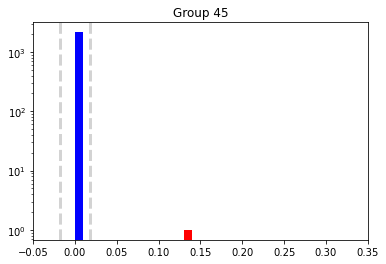

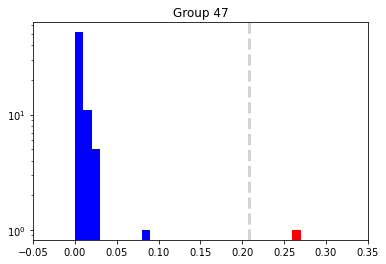

In [7]:
X = [0.01 * i for i in range(30)]
for group in [45, 47]:
    ben = []
    mal = []
    
    df = total_df[(total_df['group']==group)]
    r, ip = pagerank(df, 0.15)
    
    score = np.array(r)
    mean = np.mean(score)
    sigma = np.std(score)
    
    for i in range(len(r)):
        if mean - 6*sigma <= r[i] <= mean + 6*sigma:
            ben.append(r[i])
        else:
            mal.append(r[i])
    
    plt.title(f'Group {group}')
    plt.hist(ben, bins=X, color='blue')
    plt.hist(mal, bins=X, color='red')
    plt.yscale('log')
    plt.xlim(-0.05, 0.35)
    plt.axvline(mean - 6*sigma, 0, 1000, color='lightgray', linestyle='--', linewidth=3)
    plt.axvline(mean + 6*sigma, 0, 1000, color='lightgray', linestyle='--', linewidth=3)
    
    plt.savefig(f'group{group}.png')
    plt.show()